Import necessary libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree

Generate a synthetic binary classification dataset using sklearn's make_classification
This generates 1000 samples with 2 informative features

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

Split the data into training and testing sets (80% training, 20% testing)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize the Gradient Boosting Classifier
GradientBoostingClassifier builds an ensemble of trees where each tree tries to improve the errors of the previous trees.

'n_estimators' is the number of trees in the forest (set to 100)'learning_rate' controls the contribution of each tree (set to 0.1).

In [4]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

Fit the model using the training data

In [5]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Predict on the test data

In [6]:
y_pred = model.predict(X_test)

Essential Metrics Calculation

Accuracy

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.925


Precision

In [8]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.9090909090909091


Recall

In [9]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9375


F1 Score

In [10]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.9230769230769231


Confusion Matrix

In [11]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[95  9]
 [ 6 90]]


Visualizing the Feature Importance

Gradient Boosting provides the feature importance, showing which features contributed the most to the model

In [12]:
feature_importances = model.feature_importances_
print("\nFeature Importances:", feature_importances)


Feature Importances: [0.24441282 0.75558718]


Plot the feature importance

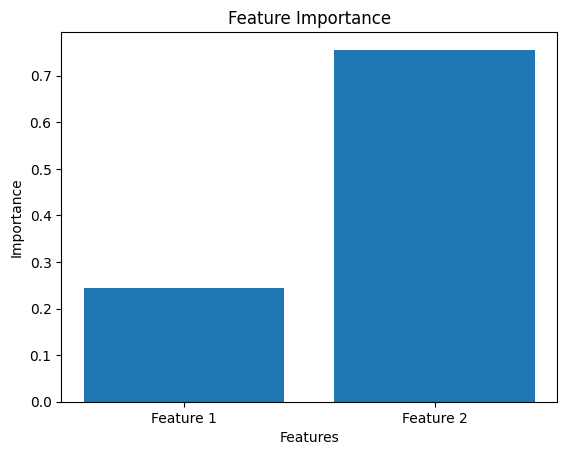

In [13]:
plt.bar(['Feature 1', 'Feature 2'], feature_importances)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

Visualizing One of the Decision Trees in the Boosted Model

Gradient Boosting uses multiple trees. Let's visualize one of the decision trees in the sequence.

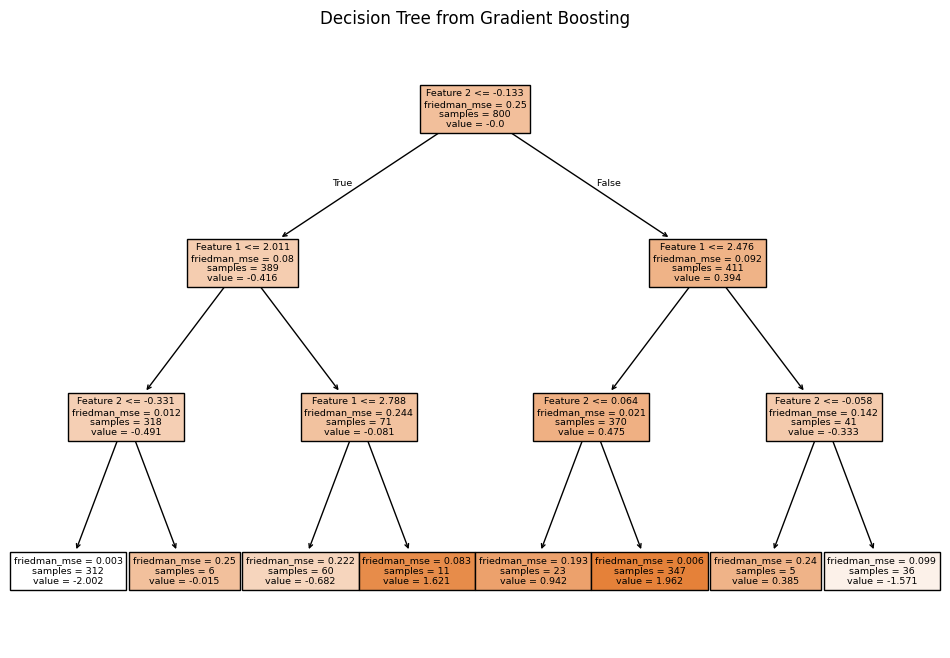

In [16]:
plt.figure(figsize=(12, 8))  # Set plot size
tree = model.estimators_[0, 0]  # Grab the first tree in the first stage of boosting
plot_tree(tree, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Decision Tree from Gradient Boosting")
plt.show()

Test the model with a new example

Let's create a test example and predict the class label

In [17]:
new_example = np.array([[0.4, 0.6]])  # A new data point (Feature 1 = 0.4, Feature 2 = 0.6)
prediction = model.predict(new_example)
print("\nPrediction for new example [0.4, 0.6]:", prediction)


Prediction for new example [0.4, 0.6]: [1]


Concept of Boosting

Boosting is a technique where models are added sequentially, and each new model attempts to fix the errors made by the previous one.

In Gradient Boosting, each tree is trained on the residuals of the previous trees.

This means each subsequent tree tries to minimize the error made by the previous trees, thereby improving overall performance.